<a href="https://colab.research.google.com/github/Karanpahwaa/Fraud-Detection-In-Transactions/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
data = pd.read_csv("/content/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(data.info())
print(data['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

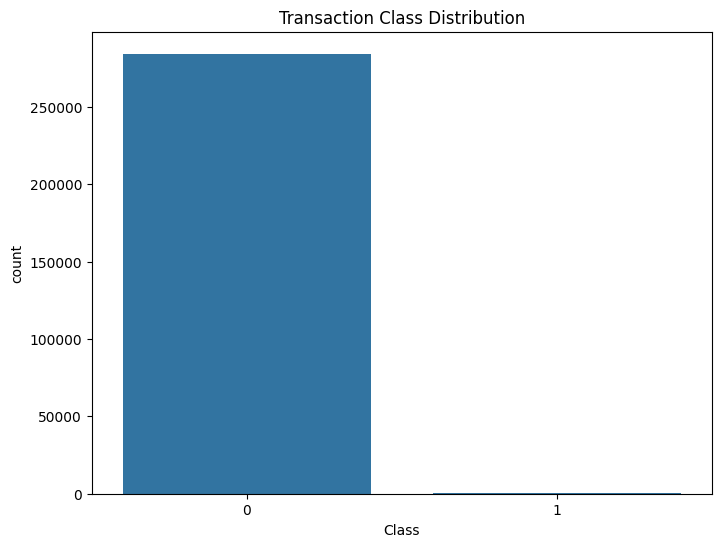

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x='Class', data=data)
plt.title("Transaction Class Distribution")
plt.show()

In [6]:
X = data.drop("Class", axis=1)  # Features (independent variables)
y = data["Class"]

In [7]:
print("Number of missing values in X:", X.isnull().sum().sum())
print("Number of missing values in y:", y.isnull().sum())

Number of missing values in X: 0
Number of missing values in y: 0


In [8]:
data = data.dropna()  # Removes rows with any NaN values


In [9]:
X = data.drop("Class", axis=1)  # Features (independent variables)
y = data["Class"]

In [10]:
X = X.fillna(X.median())  # Imputes missing values in features with the median


In [11]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Assuming 'X' and 'y' are your feature and target variables respectively
# Change n_neighbors to a value less than or equal to the minimum number of samples in any class
smote = SMOTE(random_state=42, k_neighbors=min(y.value_counts()) - 1 if min(y.value_counts()) > 1 else 1)
# If any class has only 1 sample, k_neighbors is set to 1 to avoid errors
X_resampled, y_resampled = smote.fit_resample(X, y)  # Now you can use 'smote'

In [12]:
from sklearn.preprocessing import StandardScaler  # Corrected import statement

# Assuming 'X_resampled' and 'y_resampled' are defined from previous steps

# Scale the resampled features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Now proceed with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled,
                                                    test_size=0.2, random_state=42)

In [14]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [15]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42)
}

In [16]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")


Random Forest Accuracy: 0.9978


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:29:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9993


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 227339, number of negative: 227565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.145222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499752 -> initscore=-0.000994
[LightGBM] [Info] Start training from score -0.000994


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Accuracy: 0.9975


In [17]:
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.4f}")


Best Model: XGBoost with Accuracy: 0.9993


<ipython-input-18-27437ae78913>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


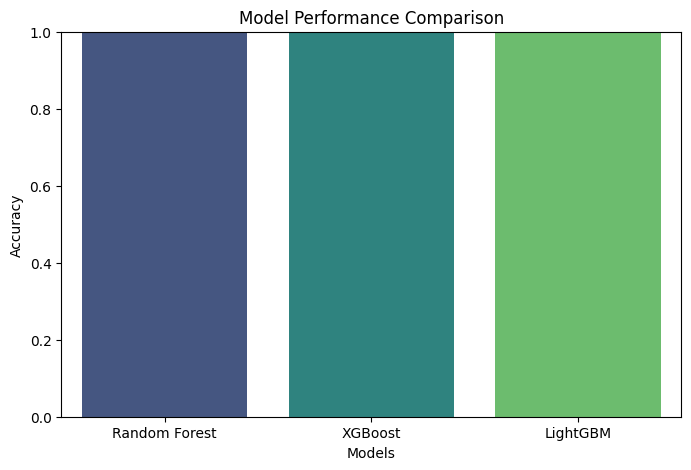

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the accuracy of different models
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)  # Since accuracy ranges from 0 to 1
plt.show()
